In [2]:
import tensorflow as tf

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('bank_note_data.csv')

In [4]:
df.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


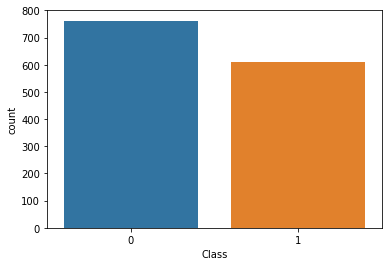

In [5]:
sns.countplot(data=df, x='Class')

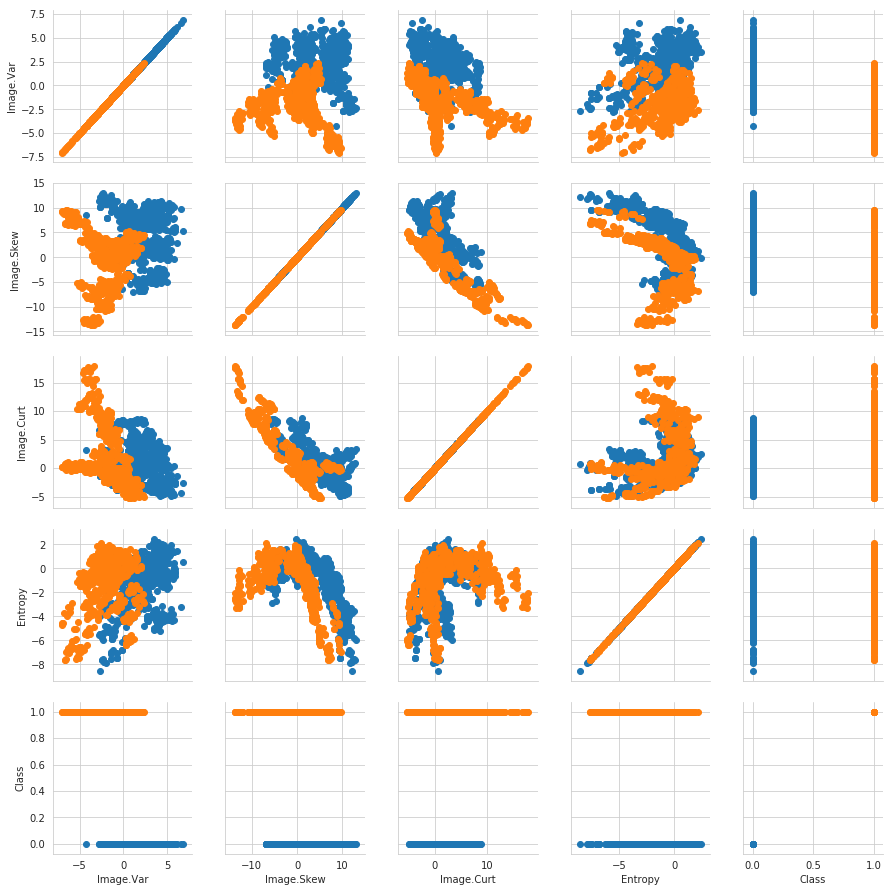

In [14]:
sns.set_style('whitegrid')

g = sns.PairGrid(data=df, hue='Class')

g = g.map(plt.scatter)

#g = g.map_offdiag(plt.scatter)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [18]:
scaled = scaler.fit_transform(X=df.drop('Class', axis=1), y=df['Class'])

In [23]:
scaleddf = pd.DataFrame(data=scaled)

In [27]:
scaleddf.columns = [u'Image.Var', u'Image.Skew', u'Image.Curt', u'Entropy']

In [28]:
scaleddf.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


In [29]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(scaleddf, df['Class'], test_size=0.33, random_state=42)

In [35]:
import tensorflow as tf

In [39]:
feature_columns = []

for col in X_train.columns:
    feature_columns.append(tf.feature_column.numeric_column(col))

In [41]:
feature_columns

[_NumericColumn(key=u'Image.Var', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key=u'Image.Skew', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key=u'Image.Curt', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key=u'Entropy', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [42]:
classifier = tf.estimator.DNNClassifier(
    feature_columns=feature_columns, hidden_units=[10, 20, 10], n_classes=3)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_global_id_in_cluster': 0, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f698db9ccd0>, '_evaluation_master': '', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_device_fn': None, '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/tmp/tmpuY5Tg6', '_train_distribute': None, '_save_summary_steps': 100}


In [43]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train, y_train, batch_size=20, shuffle=True)

In [44]:
classifier.train(input_fn=input_func, steps=500)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpuY5Tg6/model.ckpt.
INFO:tensorflow:loss = 19.252449, step = 1
INFO:tensorflow:Saving checkpoints for 46 into /tmp/tmpuY5Tg6/model.ckpt.
INFO:tensorflow:Loss for final step: 0.09518929.


In [46]:
input_func2 = tf.estimator.inputs.pandas_input_fn(X_test, shuffle=False)

In [60]:
prediction = classifier.predict(input_fn=input_func2)

In [61]:
pred = list(prediction)


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpuY5Tg6/model.ckpt-46
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [70]:
type(pred[0])

dict

In [71]:
finalpred = []

for p in pred:
    finalpred.append(int(p['class_ids'][0]))

In [72]:
finalpred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,


In [73]:
from sklearn.metrics import confusion_matrix, classification_report

In [74]:
print(confusion_matrix(y_test, finalpred))
print('\n')
print(classification_report(y_test, finalpred))

[[257   0]
 [  0 196]]


             precision    recall  f1-score   support

          0       1.00      1.00      1.00       257
          1       1.00      1.00      1.00       196

avg / total       1.00      1.00      1.00       453



In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
model = RandomForestClassifier()

In [77]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [79]:
pred = model.predict(X_test)

In [80]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[256   1]
 [  3 193]]


             precision    recall  f1-score   support

          0       0.99      1.00      0.99       257
          1       0.99      0.98      0.99       196

avg / total       0.99      0.99      0.99       453

